<a href="https://colab.research.google.com/github/sdominguer/Ciencia-de-Datos-Entrega-1-/blob/main/Untitled22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/sample_data/netflix_titles.csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

# Analisis inicial

Numero de filas, columnas y tipos de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


suma de valores nulos por columna

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df['release_year'].describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


En esta etapa se realizó la carga del dataset de Netflix y una exploración inicial de su estructura. Se verificó la correcta importación de los datos, el número de registros y variables, así como los tipos de datos y la presencia de valores faltantes, podemos evidenciar como director, cast y country tienen varios datos faltantes. Este paso es fundamental dentro de la fase de entendimiento de los datos de la metodología CRISP-DM.

# Preparacion de datos

Tratamiento de datos nulos, se pone no especificado en los campos nulos

In [ ]:
df['director'] = df['director'].fillna('No especificado')
df['cast'] = df['cast'].fillna('No especificado')
df['country'] = df['country'].fillna('No especificado')

Convertir y estandarizar fechas

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['added_year'] = df['date_added'].dt.year

Separar peliculas y series y dejar solo los numeros para poder operar

In [ ]:
movies_df = df[df['type'] == 'Movie'].copy()
series_df = df[df['type'] == 'TV Show'].copy()

In [ ]:
movies_df['duration_min'] = movies_df['duration'].str.extract(r'(\d+)').astype(float)
series_df['seasons'] = series_df['duration'].str.extract(r'(\d+)').astype(float)

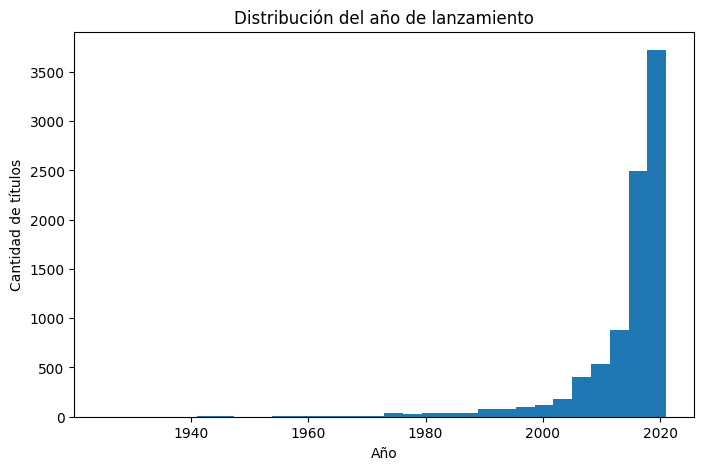

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['release_year'], bins=30)
plt.title("Distribución del año de lanzamiento")
plt.xlabel("Año")
plt.ylabel("Cantidad de títulos")
plt.show()


La variable release_year es la única variable cuantitativa original del dataset. El análisis descriptivo muestra que el catálogo de Netflix está compuesto mayoritariamente por producciones recientes, con una fuerte concentración en los últimos años. La presencia de títulos antiguos es limitada y representa una pequeña proporción del total.

### Cantidad de películas vs series

In [ ]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


<Axes: ylabel='count'>

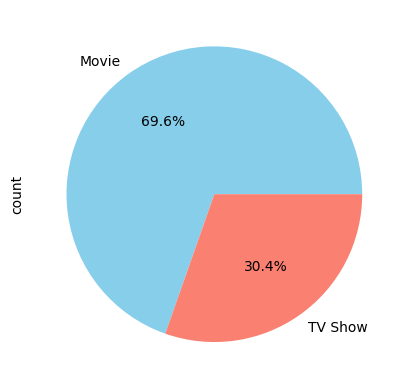

In [ ]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])


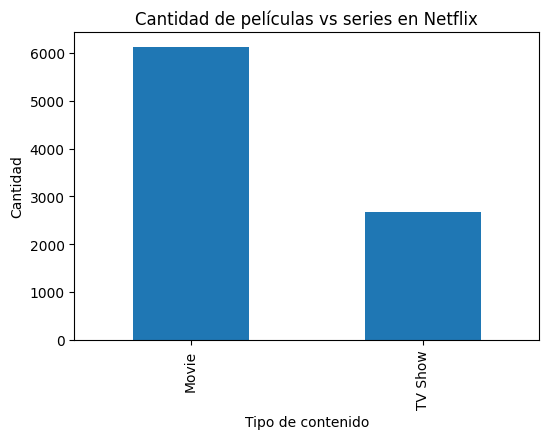

In [ ]:
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind='bar')
plt.title("Cantidad de películas vs series en Netflix")
plt.xlabel("Tipo de contenido")
plt.ylabel("Cantidad")
plt.show()


El análisis de frecuencias muestra que el catálogo de Netflix contiene una mayor cantidad de películas en comparación con series. Esto indica una estrategia orientada a ofrecer contenido de consumo rápido junto con producciones seriadas.

Con esto podemos entender en que tipo de formato se enfoca e incluso suponer que es lo que mas demanda la gente o funciona mas en netflix.

## Cantidad de títulos por género

In [ ]:
genres = df['listed_in'].str.split(',').explode().str.strip()


In [ ]:
genres.value_counts()

,count
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


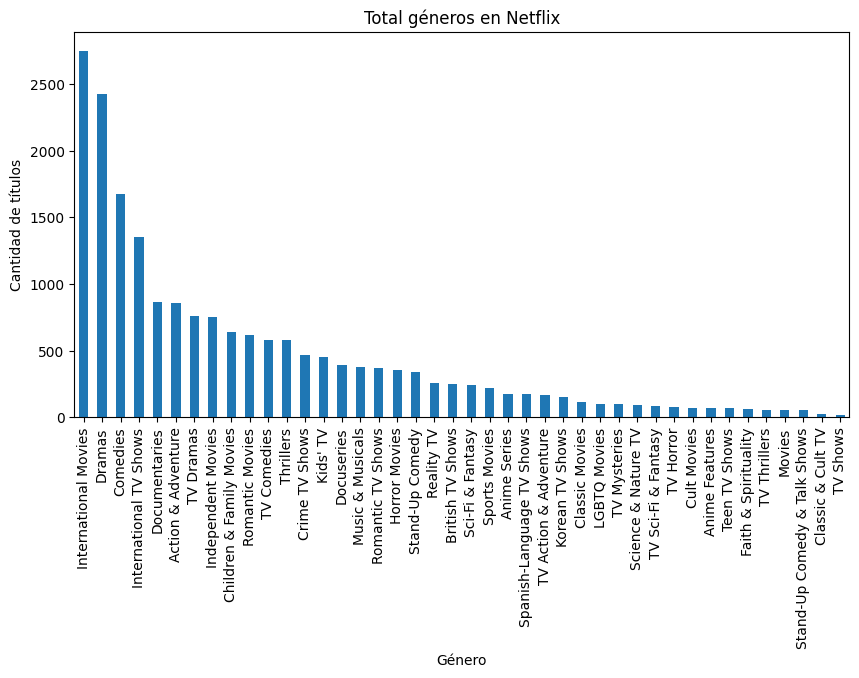

In [ ]:
plt.figure(figsize=(10,5))
genres.value_counts().plot(kind='bar')
plt.title("Total géneros en Netflix")
plt.xlabel("Género")
plt.ylabel("Cantidad de títulos")
plt.show()


Los géneros con mayor cantidad de títulos en Netflix son International Movies, Dramas y Comedies. Esto evidencia una fuerte presencia de contenido internacional y géneros de alta demanda general.

###Conteo por país

In [ ]:
countries = df['country'].dropna().str.split(',').explode().str.strip()

In [ ]:
countries.value_counts().head(15)

,count
country,
United States,3690
India,1046
United Kingdom,806
Canada,445
France,393
Japan,318
Spain,232
South Korea,231
Germany,226


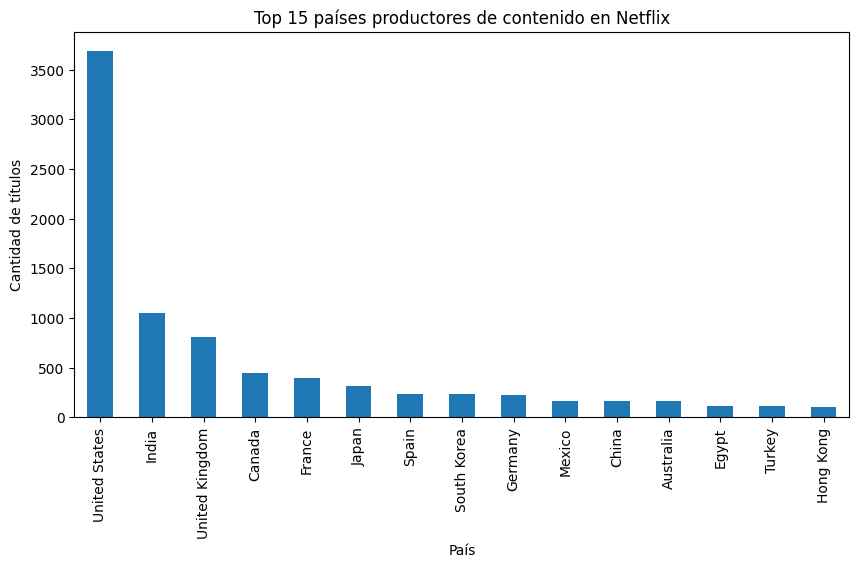

In [ ]:
plt.figure(figsize=(10,5))
countries.value_counts().head(15).plot(kind='bar')
plt.title("Top 15 países productores de contenido en Netflix")
plt.xlabel("País")
plt.ylabel("Cantidad de títulos")
plt.show()


Estados Unidos lidera ampliamente la producción de contenido disponible en Netflix, seguido por países como India y Reino Unido. Esto refleja tanto el peso de la industria audiovisual estadounidense como la expansión internacional de la plataforma.

###Conteo por rating

In [ ]:
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


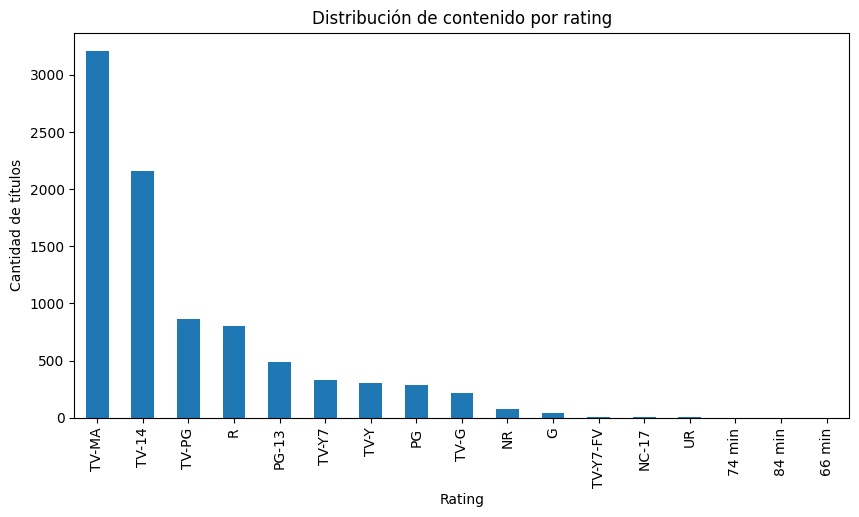

In [ ]:
plt.figure(figsize=(10,5))
df['rating'].value_counts().plot(kind='bar')
plt.title("Distribución de contenido por rating")
plt.xlabel("Rating")
plt.ylabel("Cantidad de títulos")
plt.show()


Los ratings más frecuentes son TV-MA y TV-14, lo que indica que gran parte del contenido está orientado a audiencias adolescentes y adultas. Esto sugiere una estrategia enfocada en públicos con mayor autonomía de consumo.

### Conteo de actores (cast)

In [ ]:
actors = df['cast'].dropna().str.split(',').explode().str.strip()
top_actors = actors.value_counts().head(10)
top_actors


,count
cast,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Takahiro Sakurai,32
Naseeruddin Shah,32
Rupa Bhimani,31
Om Puri,30
Akshay Kumar,30
Yuki Kaji,29


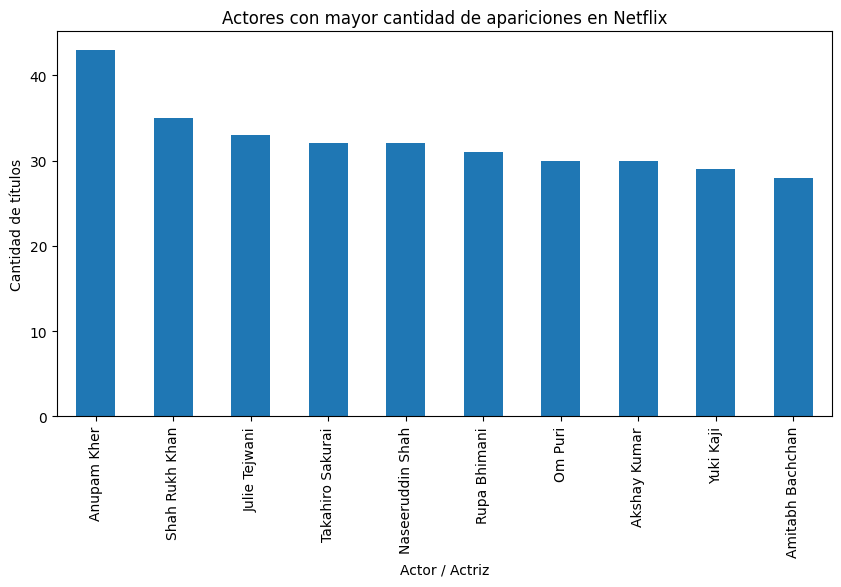

In [ ]:
plt.figure(figsize=(10,5))
actors.value_counts().head(10).plot(kind='bar')
plt.title("Actores con mayor cantidad de apariciones en Netflix")
plt.xlabel("Actor / Actriz")
plt.ylabel("Cantidad de títulos")
plt.show()


El análisis muestra que algunos actores aparecen de manera recurrente en el catálogo de Netflix, podemos sacar algunas hipotesis a partir de esto:

*   Participan en series (no en películas)
*   Esas series tienen muchas temporadas
*   Aparecen en varios títulos distintos (películas + series)

**Validemos algunas hipotesis**

¿Aparecen más en películas o en series?

In [ ]:
df_actors = df[['title', 'type', 'cast']].dropna()
df_actors = df_actors.assign(cast=df_actors['cast'].str.split(','))
df_actors = df_actors.explode('cast')
df_actors['cast'] = df_actors['cast'].str.strip()

In [ ]:
df_top_actors = df_actors[df_actors['cast'].isin(top_actors.index)]

In [ ]:
actor_type_counts=pd.crosstab(df_top_actors['cast'], df_top_actors['type'])

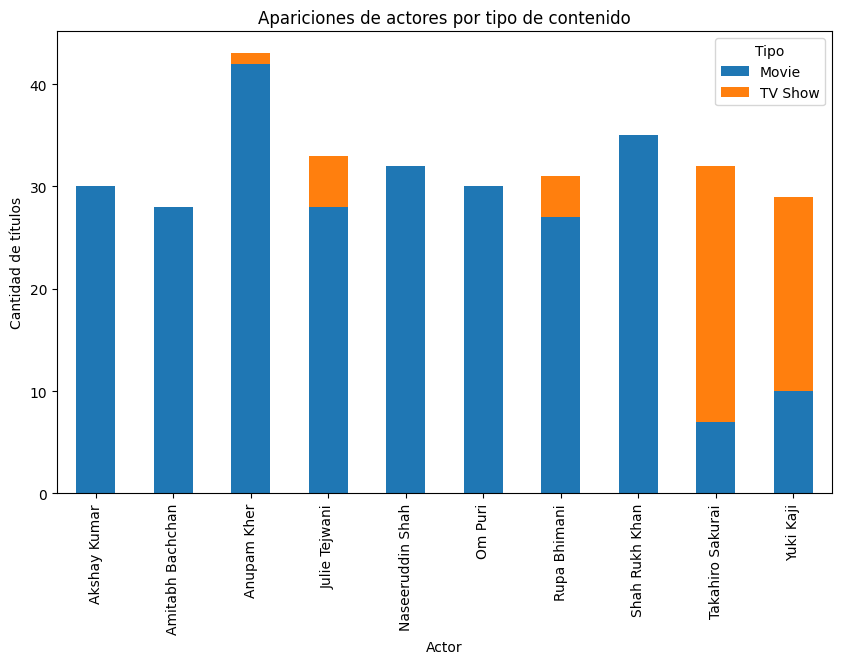

In [ ]:
actor_type_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6)
)

plt.title("Apariciones de actores por tipo de contenido")
plt.xlabel("Actor")
plt.ylabel("Cantidad de títulos")
plt.legend(title="Tipo")
plt.show()


El análisis por tipo de contenido muestra que la alta frecuencia de aparición de ciertos actores responde a patrones distintos. En el caso de actores de cine indio, la recurrencia se explica por una amplia participación en películas individuales. Por otro lado, actores de voz, principalmente asociados a producciones de animación, presentan una mayor cantidad de apariciones en series. Esto indica que la frecuencia de aparición no está necesariamente vinculada a series de larga duración, sino al tipo de industria y formato en el que participan.

### Relacionar actores con país

In [ ]:
df_actor_country = df[['cast', 'country']].dropna()

df_actor_country = df_actor_country.assign(
    cast=df_actor_country['cast'].str.split(','),
    country=df_actor_country['country'].str.split(',')
)

df_actor_country = df_actor_country.explode('cast').explode('country')
df_actor_country['cast'] = df_actor_country['cast'].str.strip()
df_actor_country['country'] = df_actor_country['country'].str.strip()


In [ ]:
actor_country_top = df_actor_country[
    df_actor_country['cast'].isin(top_actors.index)
]

In [ ]:
pd.crosstab(actor_country_top['cast'], actor_country_top['country'])


country,Canada,France,Germany,India,Japan,South Africa,Soviet Union,Sweden,United Arab Emirates,United Kingdom,United States
cast,,,,,,,,,,,
Akshay Kumar,0,0,0,29,0,0,0,0,0,0,2
Amitabh Bachchan,0,0,0,28,0,0,0,0,0,0,0
Anupam Kher,2,0,1,40,0,1,0,0,0,0,2
Julie Tejwani,0,0,0,7,0,0,0,0,0,0,0
Naseeruddin Shah,0,0,0,31,0,0,1,0,0,0,1
Om Puri,0,0,1,29,0,0,0,1,1,2,1
Rupa Bhimani,0,0,0,6,0,0,0,0,0,0,0
Shah Rukh Khan,0,1,1,34,0,0,0,0,0,1,0
Takahiro Sakurai,0,0,0,0,29,0,0,0,0,0,0


El análisis muestra una fuerte asociación entre los actores con mayor número de apariciones y países específicos. En particular, actores con alta presencia en películas se concentran en India, mientras que actores con mayor presencia en series están asociados principalmente a producciones japonesas.

### Conteo cruzado: tipo + rating

In [ ]:
pd.crosstab(df['type'], df['rating'])


rating,66 min,74 min,84 min,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,,,,
Movie,1,1,1,41,3,75,287,490,797,1427,126,2062,540,131,139,5,3
TV Show,0,0,0,0,0,5,0,0,2,733,94,1145,323,176,195,1,0


###Separar el dataset: Movies vs TV Shows

In [ ]:
movies_df = df[df['type'] == 'Movie'].copy()
series_df = df[df['type'] == 'TV Show'].copy()

Analisis cuantitativo de "duracion de peliculas"

In [ ]:
movies_df['duration_min'] = movies_df['duration'].str.extract(r'(\d+)').astype(float)

In [ ]:
movies_df['duration_min'].describe()

,duration_min
count,6128.000000
mean,99.577187
std,28.290593
min,3.000000
25%,87.000000
50%,98.000000
75%,114.000000
max,312.000000


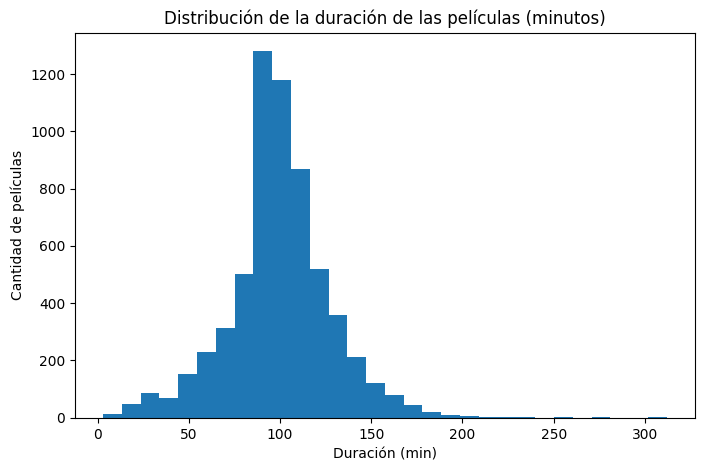

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(movies_df['duration_min'].dropna(), bins=30)
plt.title("Distribución de la duración de las películas (minutos)")
plt.xlabel("Duración (min)")
plt.ylabel("Cantidad de películas")
plt.show()


La mayoría de las películas disponibles en Netflix presentan una duración concentrada entre valores estándar de la industria cinematográfica. Existen algunos valores extremos que corresponden a películas especialmente cortas o extensas.

###Análisis cuantitativo de SERIES

In [ ]:
series_df['seasons'] = series_df['duration'].str.extract(r'(\d+)').astype(float)

In [ ]:
series_df['seasons'].describe()

,seasons
count,2676.000000
mean,1.764948
std,1.582752
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,17.000000


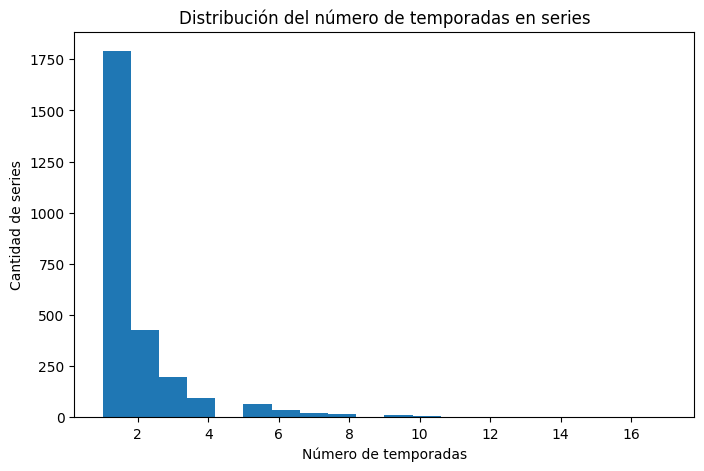

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(series_df['seasons'].dropna(), bins=20)
plt.title("Distribución del número de temporadas en series")
plt.xlabel("Número de temporadas")
plt.ylabel("Cantidad de series")
plt.show()


###Duración de películas

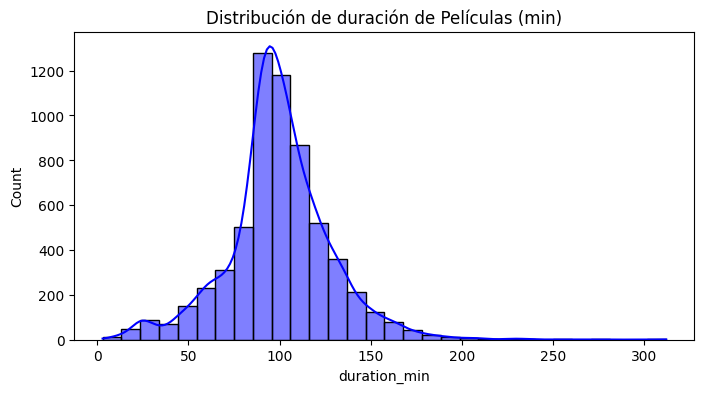

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(movies_df['duration_min'], bins=30, kde=True, color='blue')
plt.title("Distribución de duración de Películas (min)")
plt.show()

En este analisis podemos ver que hay una tendencia donde la peliculas suelen durar al rededor de 1 hora y media

###Conteo por año de lanzamiento

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month


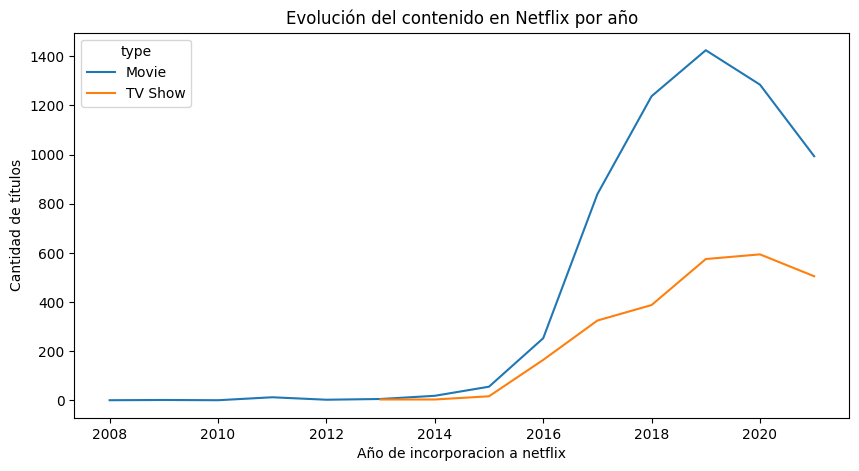

In [ ]:
titles_per_year = df.groupby(['added_year', 'type']).size().unstack()

titles_per_year.tail(20).plot(figsize=(10,5))
plt.title("Evolución del contenido en Netflix por año")
plt.xlabel("Año de incorporacion a netflix")
plt.ylabel("Cantidad de títulos")
plt.show()


###Analisis por mes, cuando agrega netflix mas contenido?

In [ ]:
titles_added_per_month = df['added_month'].value_counts().sort_index()


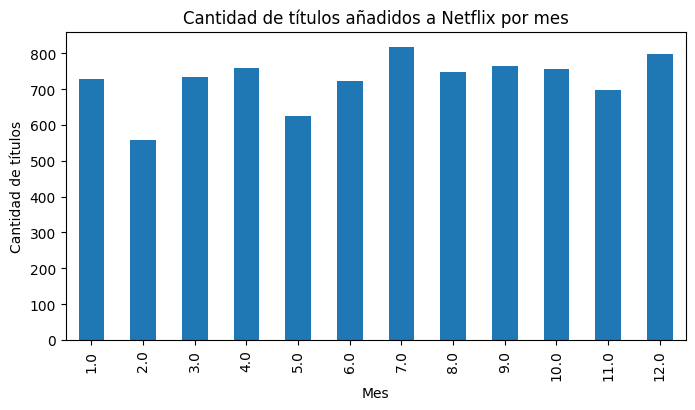

In [ ]:
plt.figure(figsize=(8,4))
titles_added_per_month.plot(kind='bar')
plt.title("Cantidad de títulos añadidos a Netflix por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de títulos")
plt.show()


Podemos ver que no hay ninguna tendencia ni anomalias, todo es muy estable a lo largo del tiempo. no se ve relacion alguna entre estas 2 columnas.

# Metodologia

para este analisis usamos CRISP-DM porque es el estandar en la idustria y nos permite tener un orden donde entendemos el negocio, preparamos los datos y finalmente hacemos su respectivo analisis para poder sacar conlcusiones y tomar deciciones estrategicas.